<a href="https://colab.research.google.com/github/enockmugisha1/UNHCR/blob/main/PCA_Formative_2_Enock_Mugisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

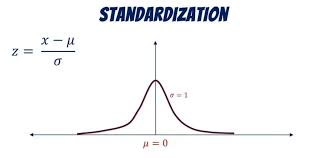


In [35]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('https://raw.githubusercontent.com/enockmugisha1/UNHCR/refs/heads/main/wfp_food_prices_caf.csv')

# -------------------------------
# 1. Handle Non-Numeric Columns (Encoding)
# -------------------------------
from sklearn.preprocessing import LabelEncoder

for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# -------------------------------
# 2. Handle Missing Values (Imputation)
# -------------------------------
# Replace NaN with column mean
data = data.fillna(data.mean())

# -------------------------------
# 3. Convert all columns to numeric (safety)
# -------------------------------
data = data.apply(pd.to_numeric, errors='coerce')

# -------------------------------
# 4. Extract NumPy array
# -------------------------------
X = data.values

# -------------------------------
# 5. Standardization (NUMPY ONLY)
# -------------------------------
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

# Avoid division by zero
std_safe = np.where(std == 0, 1, std)

standardized_data = (X - mean) / std_safe

# Show first rows
standardized_data[:5]


array([[-4.51771263e+00, -2.09199109e+00, -1.45779823e+00,
        -1.43034239e+00, -1.52268791e+00, -1.95565129e+00,
        -1.77802860e+00, -1.43254714e+00, -1.96065006e+00,
        -1.61960203e+00, -7.98401093e+00, -4.37414540e+00,
        -1.60601993e+02, -1.60601993e+02, -1.47650870e+00,
        -8.61616342e-01],
       [-4.49591288e+00, -1.64219579e+00, -1.17734759e+00,
        -1.19502391e+00,  1.62050073e+00, -9.71228338e-01,
         4.65301922e-01, -1.03956717e+00, -1.52113702e+00,
        -2.83109027e-01, -2.76018294e-01, -1.21188016e-01,
         6.22657281e-03,  6.22657281e-03, -7.69886217e-01,
        -6.60361575e-01],
       [-4.49591288e+00, -1.64219579e+00, -1.17734759e+00,
        -1.19502391e+00,  1.62050073e+00, -9.71228338e-01,
         4.65301922e-01, -1.03956717e+00, -2.02597893e-01,
         6.35729912e-01, -2.76018294e-01, -1.21188016e-01,
         6.22657281e-03,  6.22657281e-03,  1.81912857e-01,
        -5.27716387e-01],
       [-4.49591288e+00, -1.64219579e

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [36]:
# Number of samples
n_samples = standardized_data.shape[0]

# Compute covariance matrix manually (without np.cov)
cov_matrix = (standardized_data.T @ standardized_data) / (n_samples - 1)

cov_matrix


array([[ 1.00003877e+00,  3.19355312e-01,  2.38362125e-01,
         2.34989630e-01, -2.42267691e-01,  1.61099450e-01,
        -1.13015112e-01,  1.55152496e-01,  1.22151599e-01,
        -3.14295656e-02,  2.16712271e-02, -2.77105194e-02,
         2.81309572e-02,  2.81309572e-02,  1.24124352e-02,
        -5.94793271e-02],
       [ 3.19355312e-01,  1.00003877e+00,  2.18043070e-02,
         1.87924507e-02, -3.44915825e-01,  1.52288895e-01,
        -4.38006784e-01,  8.31356962e-02,  5.00913905e-02,
        -3.64603865e-02, -1.00269173e-03, -8.28042476e-02,
         1.30264399e-02,  1.30264399e-02, -3.41277923e-02,
        -1.27331325e-01],
       [ 2.38362125e-01,  2.18043070e-02,  1.00003877e+00,
         8.79505754e-01, -4.34665259e-01,  3.37398241e-01,
        -2.67885185e-02,  5.41798848e-02,  2.96534880e-02,
        -4.48986252e-02,  9.15910355e-03, -1.15818791e-01,
         9.07743872e-03,  9.07743872e-03, -5.79839610e-02,
        -5.52637671e-02],
       [ 2.34989630e-01,  1.87924507e

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [37]:
# Step 4: Perform Eigendecomposition of the Covariance Matrix

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Display results
print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[ 2.67856418e+00  2.01284094e+00  1.61508489e+00  1.40949549e+00
  1.47109303e+00  1.16519294e+00  9.59855693e-02  1.02507285e+00
  8.97233043e-01  8.53915421e-01  7.59164101e-01  3.95613221e-01
  4.68985537e-01  5.95524267e-01  5.56854848e-01 -1.83354720e-17]

Eigenvectors:
[[-3.13017641e-01  2.12150531e-02  1.97680978e-01  9.75399264e-02
  -4.58531094e-03  1.80174744e-01 -1.39928635e-03  1.57557042e-01
  -1.19333147e-01 -5.65826046e-01  5.63011422e-01  1.49777521e-01
  -2.95325665e-01 -1.59760458e-01  9.54599047e-02 -3.98638677e-18]
 [-2.60429899e-01 -9.01668094e-03  5.33625079e-01 -1.62282490e-01
  -1.27869631e-01  8.81957886e-02  3.66695257e-02 -8.49602945e-02
   8.51952152e-03 -1.33791273e-01 -7.44132213e-03 -1.89785720e-01
   7.28689903e-01  3.33860444e-02  4.64898641e-02  1.97069707e-17]
 [-4.92181889e-01 -1.98463826e-02 -3.53004872e-01  5.40310659e-02
   1.04874455e-01 -4.50263652e-02  7.13593174e-01 -1.71272303e-02
  -7.47681307e-02  2.09999594e-01  1.39185306e-01

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [43]:
# Step 5: Sort Principal Components based on Eigenvalues

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Compute explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Compute cumulative explained variance
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print results
print("Principal Components and Explained Variance:")
for i in range(len(sorted_eigenvalues)):
    print(f"PC{i+1}: Eigenvalue = {sorted_eigenvalues[i]:.4f}, "
          f"Explained Variance = {explained_variance_ratio[i]:.4f}, "
          f"Cumulative Variance = {cumulative_variance_ratio[i]:.4f}")


Principal Components and Explained Variance:
PC1: Eigenvalue = 2.6786, Explained Variance = 0.1674, Cumulative Variance = 0.1674
PC2: Eigenvalue = 2.0128, Explained Variance = 0.1258, Cumulative Variance = 0.2932
PC3: Eigenvalue = 1.6151, Explained Variance = 0.1009, Cumulative Variance = 0.3941
PC4: Eigenvalue = 1.4711, Explained Variance = 0.0919, Cumulative Variance = 0.4861
PC5: Eigenvalue = 1.4095, Explained Variance = 0.0881, Cumulative Variance = 0.5742
PC6: Eigenvalue = 1.1652, Explained Variance = 0.0728, Cumulative Variance = 0.6470
PC7: Eigenvalue = 1.0251, Explained Variance = 0.0641, Cumulative Variance = 0.7111
PC8: Eigenvalue = 0.8972, Explained Variance = 0.0561, Cumulative Variance = 0.7671
PC9: Eigenvalue = 0.8539, Explained Variance = 0.0534, Cumulative Variance = 0.8205
PC10: Eigenvalue = 0.7592, Explained Variance = 0.0474, Cumulative Variance = 0.8679
PC11: Eigenvalue = 0.5955, Explained Variance = 0.0372, Cumulative Variance = 0.9052
PC12: Eigenvalue = 0.5569, Ex

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [40]:
# Step 6: Dynamically Select Number of Principal Components

# Select the minimum number of components that explain at least 95% variance
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components selected based on 95% variance:", num_components)

# Project the standardized data onto the selected principal components
reduced_data = standardized_data @ sorted_eigenvectors[:, :num_components]

# Display first few rows of reduced data
print("Reduced data (first 5 rows):")
print(reduced_data[:5])




Number of components selected based on 95% variance: 13
Reduced data (first 5 rows):
[[ 1.15101515e+01 -2.25994297e+02 -2.22280064e+00 -1.26509259e+01
   1.75956974e+01  5.35418657e+00 -3.85453649e-01  8.39178175e-01
  -2.49326153e+00  4.66582436e-01 -8.99165498e-01  6.96811466e-01
   7.47187299e-01]
 [ 4.16839423e+00 -8.89962909e-02 -1.54001009e+00  1.14872408e-01
  -1.25438062e+00 -1.94111157e+00 -1.33653378e+00  6.25477865e-01
   1.70215782e+00 -1.53196383e+00  5.34089644e-01 -9.25231884e-01
   5.84508762e-01]
 [ 4.17558494e+00  9.24940178e-03 -1.40318436e+00 -3.85891472e-01
  -6.50507696e-01 -1.55988781e+00 -1.27709429e-01 -1.35662799e-01
   2.19848077e+00 -1.82798225e+00  2.34273534e-01 -6.11440870e-01
   6.17741361e-01]
 [ 4.17779339e+00  7.08948247e-02 -1.47892687e+00 -1.14517449e+00
  -5.20977008e-01 -1.52301224e+00  3.88803179e-01 -3.83823612e-01
   2.38465515e+00 -1.81006087e+00  9.23208673e-02 -5.47510597e-01
   5.26988158e-01]
 [ 4.15148408e+00  5.09763522e-02 -1.31133777e+

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [41]:
print(f'Reducing the Data Shape: {reduced_data.shape}')
reduced_data[:5]


Reducing the Data Shape: (25794, 13)


array([[ 1.15101515e+01, -2.25994297e+02, -2.22280064e+00,
        -1.26509259e+01,  1.75956974e+01,  5.35418657e+00,
        -3.85453649e-01,  8.39178175e-01, -2.49326153e+00,
         4.66582436e-01, -8.99165498e-01,  6.96811466e-01,
         7.47187299e-01],
       [ 4.16839423e+00, -8.89962909e-02, -1.54001009e+00,
         1.14872408e-01, -1.25438062e+00, -1.94111157e+00,
        -1.33653378e+00,  6.25477865e-01,  1.70215782e+00,
        -1.53196383e+00,  5.34089644e-01, -9.25231884e-01,
         5.84508762e-01],
       [ 4.17558494e+00,  9.24940178e-03, -1.40318436e+00,
        -3.85891472e-01, -6.50507696e-01, -1.55988781e+00,
        -1.27709429e-01, -1.35662799e-01,  2.19848077e+00,
        -1.82798225e+00,  2.34273534e-01, -6.11440870e-01,
         6.17741361e-01],
       [ 4.17779339e+00,  7.08948247e-02, -1.47892687e+00,
        -1.14517449e+00, -5.20977008e-01, -1.52301224e+00,
         3.88803179e-01, -3.83823612e-01,  2.38465515e+00,
        -1.81006087e+00,  9.23208673e

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

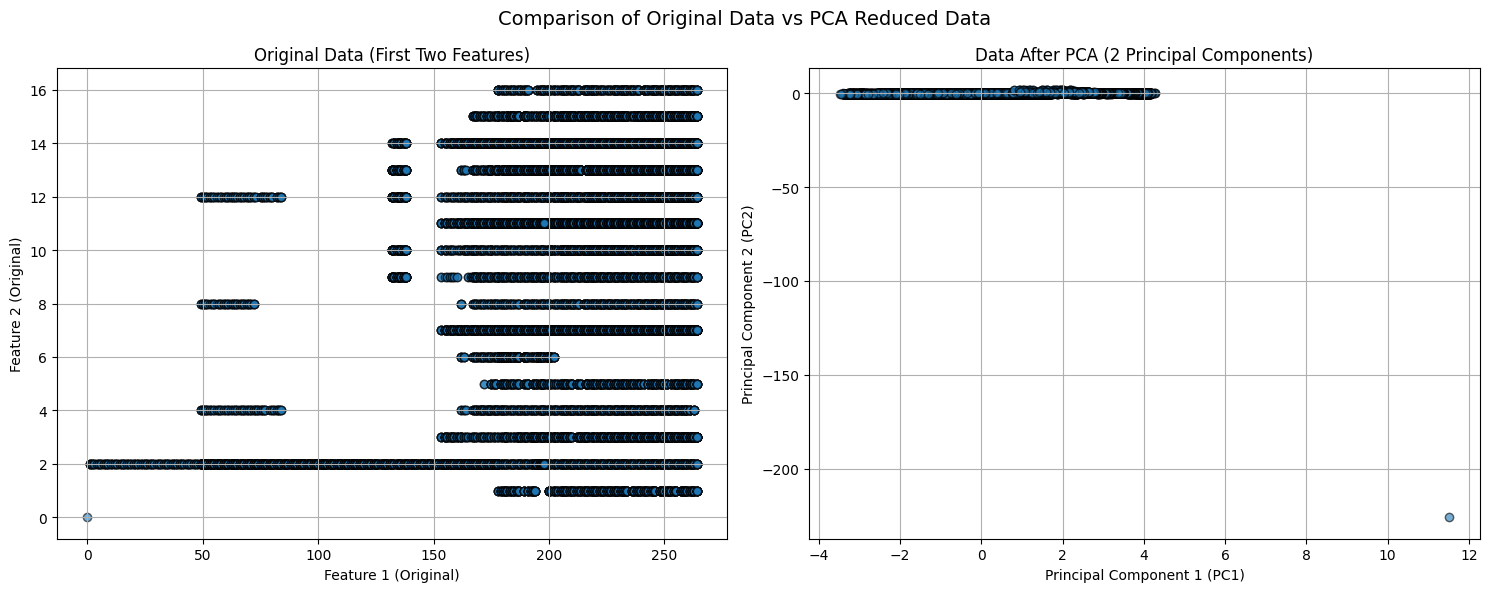

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

# ------------------ Original Data Plot ------------------
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, edgecolor='k')
plt.title("Original Data (First Two Features)", fontsize=12)
plt.xlabel("Feature 1 (Original)")
plt.ylabel("Feature 2 (Original)")
plt.grid(True)

# ------------------ PCA Reduced Data Plot ------------------
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6, edgecolor='k')
plt.title("Data After PCA (2 Principal Components)", fontsize=12)
plt.xlabel("Principal Component 1 (PC1)")
plt.ylabel("Principal Component 2 (PC2)")
plt.grid(True)

plt.suptitle("Comparison of Original Data vs PCA Reduced Data", fontsize=14)
plt.tight_layout()
plt.show()


